In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
from tensorflow.keras.applications import ResNet101
from tensorflow.keras.layers import Conv2DTranspose, Conv2D, UpSampling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import img_to_array

In [3]:
# 读取相关数据
save_dir = 'drive/MyDrive/Colab Notebooks/data_512/'

train_images = np.load(os.path.join(save_dir, 'train_images.npy'))
train_masks = np.load(os.path.join(save_dir, 'train_masks.npy'))
valid_images = np.load(os.path.join(save_dir, 'valid_images.npy'))
valid_masks = np.load(os.path.join(save_dir, 'valid_masks.npy'))

# 定义 Resnet101 + FCN 模型
def build_fcn_model():
    # 使用 ResNet101 作为特征提取器
    resnet_base = ResNet101(weights='imagenet', include_top=False, input_shape=(512, 512, 3))

    # 冻结所有层
    for layer in resnet_base.layers:
        layer.trainable = False

    # 获取预训练输出
    x = resnet_base.output

    # 添加分割头 (多层上采样 + 卷积)
    x = Conv2DTranspose(512, (3, 3), strides=(2, 2), padding='same', activation='relu')(x)
    x = Conv2D(512, (3, 3), padding='same', activation='relu')(x)
    x = Conv2DTranspose(256, (3, 3), strides=(2, 2), padding='same', activation='relu')(x)
    x = Conv2D(256, (3, 3), padding='same', activation='relu')(x)
    x = Conv2DTranspose(128, (3, 3), strides=(2, 2), padding='same', activation='relu')(x)
    x = Conv2D(128, (3, 3), padding='same', activation='relu')(x)
    x = Conv2DTranspose(64, (3, 3), strides=(2, 2), padding='same', activation='relu')(x)
    x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
    x = UpSampling2D(size=(2, 2))(x)  # 上采样到 512x512
    x = Conv2D(4, (1, 1), activation='softmax')(x)  # 最终输出与类别数一致，3类+背景

    # 创建模型
    model = Model(inputs=resnet_base.input, outputs=x)
    return model

# 构建并编译模型
model = build_fcn_model()
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 训练模型并保存
model.fit(train_images, train_masks, epochs=50, batch_size=16, validation_data=(valid_images, valid_masks))
model.save('drive/MyDrive/Colab Notebooks/RN101_FCN_model.keras')

171446536/171446536 ━━━━━━━━━━━━━━━━━━━━ 8s 0us/step
Epoch 1/50
199/199 ━━━━━━━━━━━━━━━━━━━━ 93s 285ms/step - accuracy: 0.8581 - loss: 0.3713 - val_accuracy: 0.9729 - val_loss: 0.0791
Epoch 2/50
199/199 ━━━━━━━━━━━━━━━━━━━━ 21s 106ms/step - accuracy: 0.9745 - loss: 0.0741 - val_accuracy: 0.9783 - val_loss: 0.0609
Epoch 3/50
199/199 ━━━━━━━━━━━━━━━━━━━━ 21s 106ms/step - accuracy: 0.9802 - loss: 0.0551 - val_accuracy: 0.9792 - val_loss: 0.0599
Epoch 4/50
199/199 ━━━━━━━━━━━━━━━━━━━━ 21s 106ms/step - accuracy: 0.9829 - loss: 0.0463 - val_accuracy: 0.9805 - val_loss: 0.0560
Epoch 5/50
199/199 ━━━━━━━━━━━━━━━━━━━━ 21s 107ms/step - accuracy: 0.9852 - loss: 0.0393 - val_accuracy: 0.9805 - val_loss: 0.0590
Epoch 6/50
199/199 ━━━━━━━━━━━━━━━━━━━━ 21s 107ms/step - accuracy: 0.9867 - loss: 0.0353 - val_accuracy: 0.9802 - val_loss: 0.0619
Epoch 7/50
199/199 ━━━━━━━━━━━━━━━━━━━━ 21s 107ms/step - accuracy: 0.9878 - loss: 0.0323 - val_accuracy: 0.9808 - val_loss: 0.0619
Epoch 8/50
199/199 ━━━━━━━━━━━

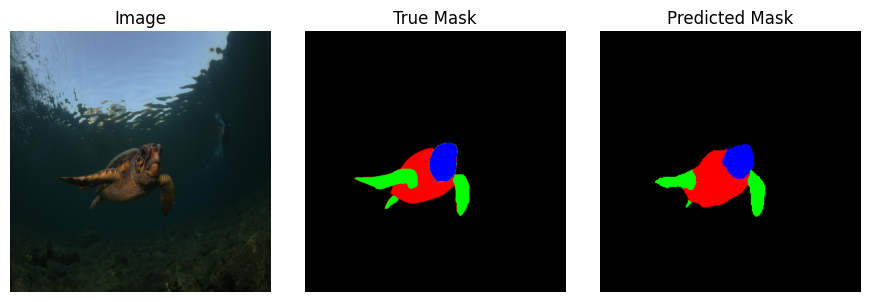


Image 1:	
Class 1 IoU: 0.6701	Class 2 IoU: 0.5907	Class 3 IoU: 0.8024	

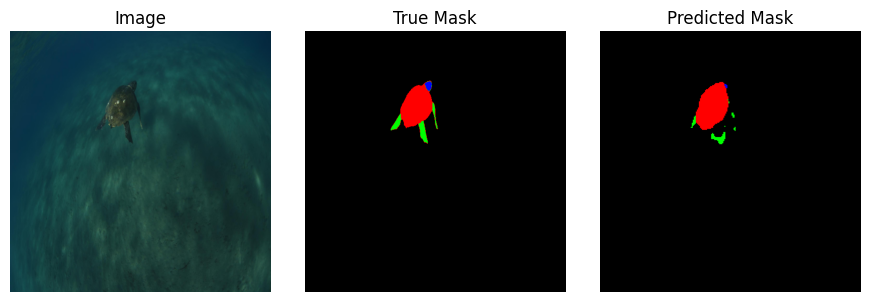


Image 2:	
Class 1 IoU: 0.8233	Class 2 IoU: 0.1685	Class 3 IoU: 0.1270	

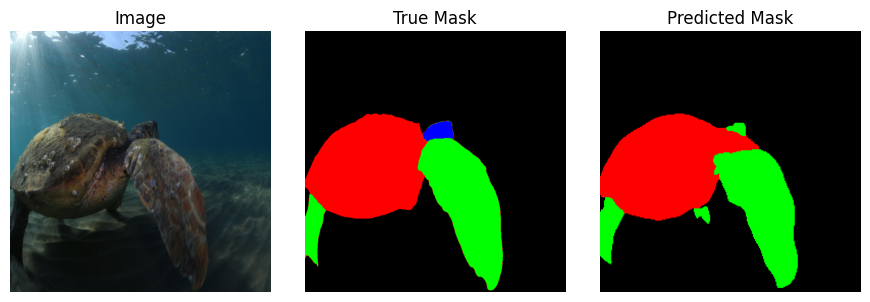


Image 3:	
Class 1 IoU: 0.8917	Class 2 IoU: 0.8360	Class 3 IoU: 0.0000	

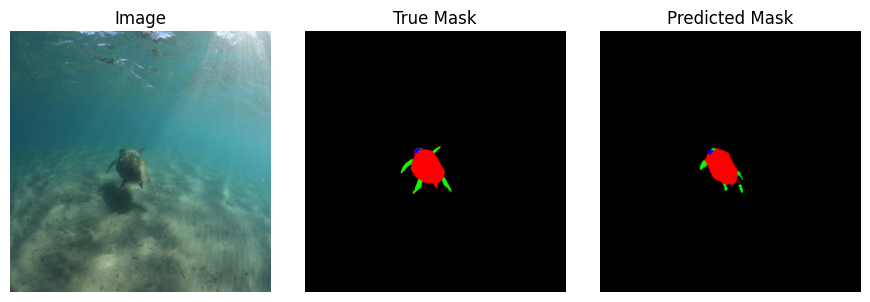


Image 4:	
Class 1 IoU: 0.8158	Class 2 IoU: 0.1198	Class 3 IoU: 0.3879	

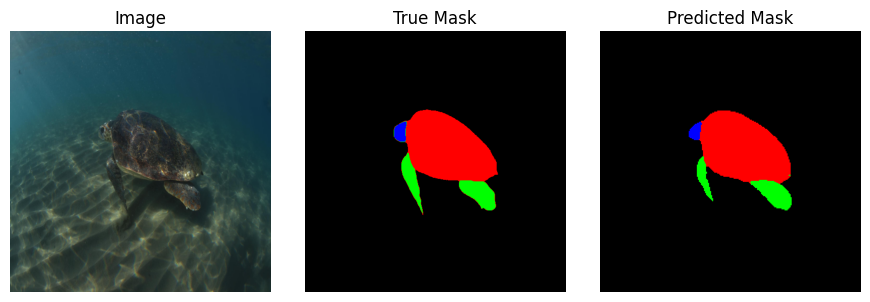


Image 5:	
Class 1 IoU: 0.9463	Class 2 IoU: 0.7282	Class 3 IoU: 0.8065	

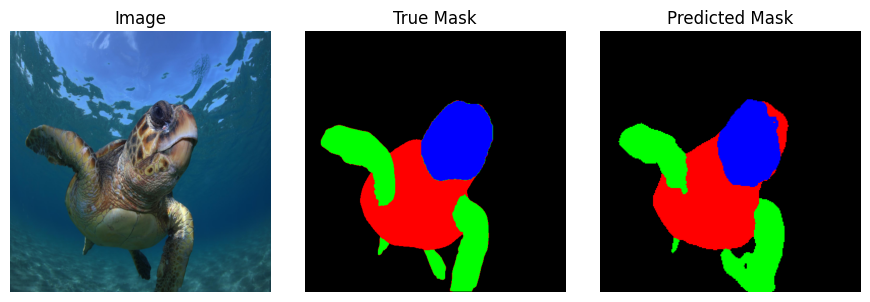


Image 6:	
Class 1 IoU: 0.7894	Class 2 IoU: 0.7711	Class 3 IoU: 0.8349	

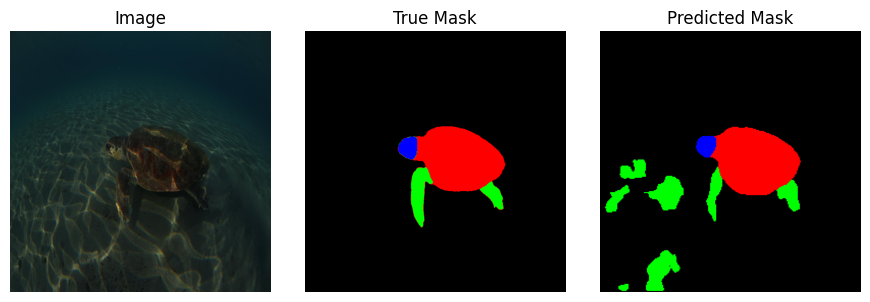


Image 7:	
Class 1 IoU: 0.8949	Class 2 IoU: 0.2065	Class 3 IoU: 0.6688	

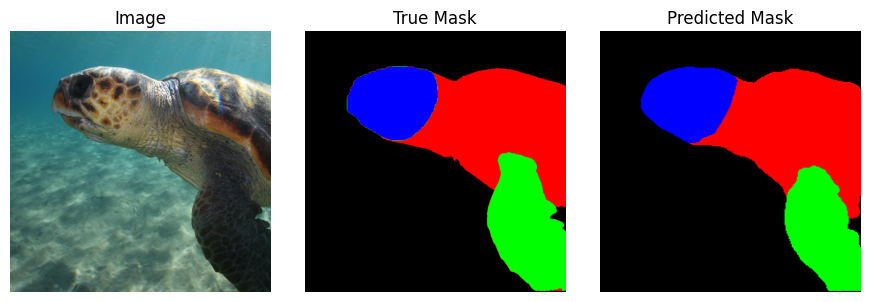


Image 8:	
Class 1 IoU: 0.9088	Class 2 IoU: 0.8533	Class 3 IoU: 0.9480	

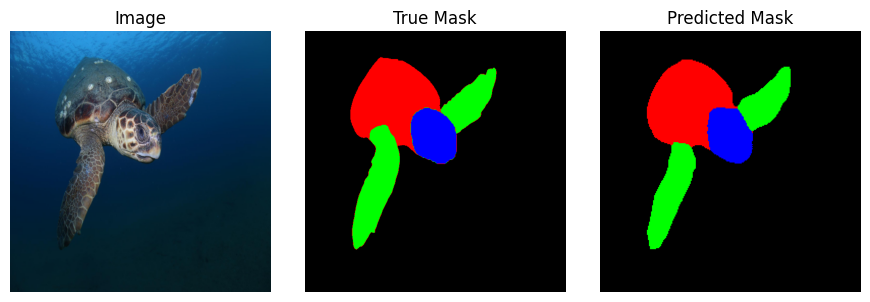


Image 9:	
Class 1 IoU: 0.8473	Class 2 IoU: 0.8244	Class 3 IoU: 0.9145	

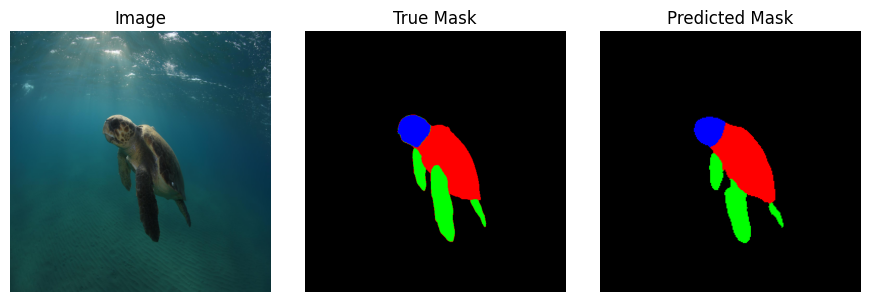


Image 10:	
Class 1 IoU: 0.8415	Class 2 IoU: 0.6428	Class 3 IoU: 0.8872	


Class 1 mIoU: 0.8180	Class 2 mIoU: 0.6009	Class 3 mIoU: 0.6349	
Overall mIoU across all classes: 0.6846


In [4]:
# 读取相关数据与模型
save_dir = 'drive/MyDrive/Colab Notebooks/data_512/'
test_images = np.load(os.path.join(save_dir, 'test_images.npy'))
test_masks = np.load(os.path.join(save_dir, 'test_masks.npy'))
model = tf.keras.models.load_model('drive/MyDrive/Colab Notebooks/RN101_FCN_model.keras')

# 可视化预测结果
def visualize_fcn_results(image, mask_true, mask_pred):
    # NumPy数组转换为PIL Image对象
    image = Image.fromarray(image.astype(np.uint8)).resize((512, 512))

    # 创建彩色掩码
    mask_true_colored = np.zeros((512, 512, 3), dtype=np.uint8)
    mask_pred_colored = np.zeros((512, 512, 3), dtype=np.uint8)

    # 颜色字典，每个类别分配一个不同的颜色
    colors = {
        0: (0, 0, 0),       # 背景，黑色
        1: (255, 0, 0),     # 类别1，红色
        2: (0, 255, 0),     # 类别2，绿色
        3: (0, 0, 255),     # 类别3，蓝色
    }

    # 为每个类别分配颜色
    mask_true = mask_true.reshape((512, 512))
    mask_pred = np.argmax(mask_pred, axis=-1).reshape((512, 512))

    for class_id, color in colors.items():
        mask_true_colored[mask_true == class_id] = color
        mask_pred_colored[mask_pred == class_id] = color

    # 可视化
    plt.figure(figsize=(9, 3))
    plt.subplot(1, 3, 1)
    plt.title("Image")
    plt.imshow(image)
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.title("True Mask")
    plt.imshow(mask_true_colored)
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.title("Predicted Mask")
    plt.imshow(mask_pred_colored)
    plt.axis('off')

    plt.tight_layout()
    plt.show()

# 为指定类别计算IoU
def calculate_iou(true_mask, pred_mask, class_id):
    true_class = (true_mask == class_id)
    pred_class = (pred_mask == class_id)
    intersection = np.logical_and(true_class, pred_class).sum()
    union = np.logical_or(true_class, pred_class).sum()

    if union == 0:
        return np.nan  # 避免分母为零的情况
    else:
        return intersection / union

if len(test_images) > 0 and len(test_masks) > 0:
    num_visualize = 10  # 可视化图像数量
    for i in range(num_visualize):
        sample_image = test_images[i]
        sample_mask = test_masks[i]
        sample_prediction = model.predict(np.expand_dims(sample_image, axis=0), verbose=0)[0]
        visualize_fcn_results(sample_image, sample_mask, sample_prediction)

        # 计算每类的IoU
        pred_mask = np.argmax(sample_prediction, axis=-1).reshape((512, 512))
        true_mask = sample_mask.reshape((512, 512))

        print(f"\nImage {i + 1}:\t")
        for class_id in range(1, 4):  # 从1开始，因为0是背景
            iou = calculate_iou(true_mask, pred_mask, class_id)
            if not np.isnan(iou):
                print(f"Class {class_id} IoU: {iou:.4f}", end = '\t')
            else:
                print(f"Class {class_id} IoU: NaN (no instances in true mask)", end = '\t')


# 计算并打印每个类的mIoU
def evaluate_miou(test_images, test_masks, model, num_classes=4):
    ious_per_class = {i: [] for i in range(1, num_classes)}  # 存储每类的IoU

    for i in range(len(test_images)):
        sample_image = test_images[i]
        sample_mask = test_masks[i]
        sample_prediction = model.predict(np.expand_dims(sample_image, axis=0), verbose=0)[0]
        pred_mask = np.argmax(sample_prediction, axis=-1).reshape((512, 512))
        true_mask = sample_mask.reshape((512, 512))

        # 对每个类别计算IoU
        for class_id in range(1, num_classes):  # 从1开始，因为0是背景
            iou = calculate_iou(true_mask, pred_mask, class_id)
            if not np.isnan(iou):  # 只添加有效的IoU
                ious_per_class[class_id].append(iou)

    # 计算每个类的mIoU
    mean_ious = {}
    print("\n\n")
    for class_id, ious in ious_per_class.items():
        mean_ious[class_id] = np.nanmean(ious) if ious else np.nan  # 忽略NaN
        print(f"Class {class_id} mIoU: {mean_ious[class_id]:.4f}", end = '\t')

    # 计算并输出整体mIoU
    overall_miou = np.nanmean(list(mean_ious.values()))
    print(f"\nOverall mIoU across all classes: {overall_miou:.4f}")
    return mean_ious, overall_miou

# 并计算每类的mIoU
if len(test_images) > 0 and len(test_masks) > 0:
    mean_ious, overall_miou = evaluate_miou(test_images, test_masks, model)